# Project 4: Wrangle and Analyse Data

author: Leonardo Rodríguez
Date: March 13, 2021

## Introduction

In the following project we will be gathering three different files in order to process it according to the data analysis requirements. We will apply the data wrangling techniques for the analysis process, assessing data, applying data cleaning techniques, to make the data suitable for the analysis. We will create cleaned new data frame to apply on them the analysis and the visualizations when is necessary. 

# Gathering Data


### Importing the necessary libraries to generate the code environment to work properly with the data

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import matplotlib.pyplot as plt
import plotly.express as px
import json
import tidytext
import os
#in order to see more content of the "text Column we change the display option of pandas"
pd.options.display.max_colwidth = 150

### Twitter's API connection
We use this API object that allows us to gather Twitter data.

In [2]:
consumer_key = 'x'
consumer_secret = 'x'
access_token = 'x'
access_secret = 'x'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret,)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


With this code we verify if the conecction is working!

In [3]:
info = api.me()
print (json.dumps(info._json, indent = 2))

{
  "id": 3005834001,
  "id_str": "3005834001",
  "name": "Leonardo",
  "screen_name": "Leonard45582611",
  "location": "",
  "profile_location": null,
  "description": "",
  "url": null,
  "entities": {
    "description": {
      "urls": []
    }
  },
  "protected": false,
  "followers_count": 5,
  "friends_count": 74,
  "listed_count": 0,
  "created_at": "Fri Jan 30 16:02:20 +0000 2015",
  "favourites_count": 140,
  "utc_offset": null,
  "time_zone": null,
  "geo_enabled": false,
  "verified": false,
  "statuses_count": 134,
  "lang": null,
  "status": {
    "created_at": "Sat Mar 20 18:08:24 +0000 2021",
    "id": 1373335631045222404,
    "id_str": "1373335631045222404",
    "text": "RT @GretaThunberg: The true face of Chevron and Big Oil.\nWatch and share. #FreeDonziger https://t.co/RVyJp3FP9i",
    "truncated": false,
    "entities": {
      "hashtags": [
        {
          "text": "FreeDonziger",
          "indices": [
            74,
            87
          ]
        }
      ]

Obtaining information from Tweeter account WeRateDogs

In [4]:
weratedogs_data = api.get_user('WeRateDogs')
print (json.dumps(weratedogs_data._json, indent = 2))

{
  "id": 4479836353,
  "id_str": "4479836353",
  "name": "We Rate Dogs",
  "screen_name": "WeRateDogs",
  "location": "",
  "profile_location": null,
  "description": "DM YOUR DOGS TO BE RATED",
  "url": null,
  "entities": {
    "description": {
      "urls": []
    }
  },
  "protected": false,
  "followers_count": 3360,
  "friends_count": 0,
  "listed_count": 14,
  "created_at": "Sun Dec 06 22:58:49 +0000 2015",
  "favourites_count": 0,
  "utc_offset": null,
  "time_zone": null,
  "geo_enabled": false,
  "verified": false,
  "statuses_count": 1,
  "lang": null,
  "status": {
    "created_at": "Fri Dec 18 20:09:02 +0000 2015",
    "id": 677943675062620160,
    "id_str": "677943675062620160",
    "text": "This Tweet from @ has been withheld in response to a report from the copyright holder. Learn more.",
    "truncated": false,
    "entities": {
      "hashtags": [],
      "symbols": [],
      "user_mentions": [],
      "urls": [
        {
          "url": "https://support.twitter.com

Obtaining just some values from the diccionary of tweeters from Tweeter account WeRateDogs

In [5]:
for tweeters in tweepy.Cursor(api.user_timeline, screen_name = 'WeRateDogs', tweet_mode = 'extended').items(100):
    print (json.dumps(tweeters._json, indent = 4))

{
    "created_at": "Fri Dec 18 20:09:02 +0000 2015",
    "id": 677943675062620160,
    "id_str": "677943675062620160",
    "full_text": "This Tweet from @WeRateDogs has been withheld in response to a report from the copyright holder. Learn more.",
    "truncated": false,
    "display_text_range": [
        0,
        108
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [],
        "urls": [
            {
                "url": "https://support.twitter.com/articles/15795",
                "expanded_url": "https://support.twitter.com/articles/15795",
                "display_url": "Learn more",
                "indices": [
                    97,
                    107
                ]
            }
        ]
    },
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_

Reading "twitter-archive-enhanced" file and showing the first rows

In [2]:
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Reading content of tweet-json and showing the first rows

In [3]:
dftweet = pd.read_json("tweet-json.txt", lines=True)
dftweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIA...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAU...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAAN...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuu...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, '...","{'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Downloading html file "image-predictions"

In [4]:
ip_html = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

#ip_html.headers['content-type']
ip_html.text

"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/m

### Load the "image-predictions.tsv" file into a df. 
 Due to the format of the file, we use "sep='\t', header=0" options to read it properly 

In [5]:
dfimg = pd.read_csv("image-predictions.tsv", sep='\t', header=0)
dfimg.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Assessing Data

### Analyzing content of data frame

### Exploring the data

Obtaining the info from de dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
dftweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [8]:
dfimg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Obtaining numerical statics from the dataset

In [9]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
dftweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [11]:
dfimg.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Viewing a sample of the data

In [12]:
df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
392,826115272272650244,NaN,NaN,2017-01-30 17:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ike. He's demonstrating the pupmost restraint. 13/10 super good boy https://t.co/6gHoGah9nm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826115272272650244/photo/1,13,10,Ike,None,None,None,None
1179,719367763014393856,NaN,NaN,2016-04-11 03:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sid &amp; Murphy. Murphy floats alongside Sid and whispers motivational quotes in his ear. Magical af. Both 11/10 https://t.co/7mmjyearQW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719367763014393856/photo/1,11,10,Sid,None,None,None,None
1855,675531475945709568,NaN,NaN,2015-12-12 04:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ellie AKA Queen Slayer of the Orbs. Very self-motivated. Great yard. Rad foliage. 10/10 would pet diligently https://t.co/c9jmg3Xtzn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675531475945709568/photo/1,10,10,Ellie,None,None,None,None


In [13]:
dftweet.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1865,2015-12-11 15:19:21+00:00,675334060156301312,675334060156301312,Good morning here's a grass pupper. 12/10 https://t.co/2d68FmWGGs,False,"[0, 65]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 675334050127544320, 'id_str': '675334050127544320', 'indices': [...","{'media': [{'id': 675334050127544320, 'id_str': '675334050127544320', 'indices': [42, 65], 'media_url': 'http://pbs.twimg.com/media/CV9EvZKUAAA3_X...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,3007,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1220,2016-03-28 01:10:13+00:00,714258258790387713,714258258790387712,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,False,"[0, 143]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 714258253283213313, 'id_str': '714258253283213313', 'indices': [...","{'media': [{'id': 714258253283213313, 'id_str': '714258253283213313', 'indices': [120, 143], 'media_url': 'http://pbs.twimg.com/media/CemOGNjWQAEo...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,3281,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1232,2016-03-23 19:09:09+00:00,712717840512598017,712717840512598016,Please don't send in any more polar bears. We only rate dogs. Thank you... 10/10 https://t.co/83RGhdIQz2,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 712717831029202944, 'id_str': '712717831029202944', 'indices': [...","{'media': [{'id': 712717831029202944, 'id_str': '712717831029202944', 'indices': [81, 104], 'media_url': 'http://pbs.twimg.com/media/CeQVF1eVIAAJa...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,13474,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [15]:
dfimg.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1520,787810552592695296,https://pbs.twimg.com/media/Cu7dg2RXYAIaGXE.jpg,2,pug,0.362835,True,French_bulldog,0.221864,True,English_setter,0.080418,True
1585,797545162159308800,https://pbs.twimg.com/media/CxFzFAAUAAA5C9z.jpg,1,Pembroke,0.954089,True,Cardigan,0.033644,True,papillon,0.009736,True
60,667138269671505920,https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg,1,West_Highland_white_terrier,0.747713,True,Samoyed,0.243629,True,toy_poodle,0.001804,True
255,670755717859713024,https://pbs.twimg.com/media/CU8AwZ_UsAA-Lbu.jpg,1,keeshond,0.994065,True,Norwegian_elkhound,0.001827,True,cairn,0.001821,True
1591,798665375516884993,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True


Cheking the data counts of some columns

In [16]:
df.tweet_id.value_counts()

700151421916807169    1
674764817387900928    1
794926597468000259    1
701570477911896070    1
715220193576927233    1
                     ..
674742531037511680    1
756651752796094464    1
743545585370791937    1
770655142660169732    1
749075273010798592    1
Name: tweet_id, Length: 2356, dtype: int64

In [17]:
dftweet.id.value_counts()

700151421916807169    1
713175907180089344    1
754482103782404096    1
699446877801091073    1
794926597468000259    1
                     ..
674742531037511680    1
756651752796094464    1
743545585370791937    1
770655142660169732    1
749075273010798592    1
Name: id, Length: 2354, dtype: int64

In [18]:
dfimg.tweet_id.value_counts()

700151421916807169    1
740373189193256964    1
836989968035819520    1
816336735214911488    1
688828561667567616    1
                     ..
675354435921575936    1
759923798737051648    1
705475953783398401    1
693231807727280129    1
817056546584727552    1
Name: tweet_id, Length: 2075, dtype: int64

Cheking for duplicates values in some columns

In [19]:
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
dftweet[dftweet.id.duplicated()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


In [21]:
dfimg[dfimg.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Checking the data values ordered from df to find any inconsistency

In [22]:
df.tweet_id.sort_values()

2355    666020888022790149
2354    666029285002620928
2353    666033412701032449
2352    666044226329800704
2351    666049248165822465
               ...        
4       891327558926688256
3       891689557279858688
2       891815181378084864
1       892177421306343426
0       892420643555336193
Name: tweet_id, Length: 2356, dtype: int64

In [23]:
df.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [24]:
df.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

Checking the data values ordered from dftweet to find any inconsistency

In [25]:
dftweet.id.sort_values()

2353    666020888022790149
2352    666029285002620928
2351    666033412701032449
2350    666044226329800704
2349    666049248165822465
               ...        
4       891327558926688256
3       891689557279858688
2       891815181378084864
1       892177421306343426
0       892420643555336193
Name: id, Length: 2354, dtype: int64

In [26]:
dftweet.id_str.sort_values()

2353    666020888022790144
2352    666029285002620928
2351    666033412701032448
2350    666044226329800704
2349    666049248165822464
               ...        
4       891327558926688256
3       891689557279858688
2       891815181378084864
1       892177421306343424
0       892420643555336192
Name: id_str, Length: 2354, dtype: int64

In [27]:
dftweet.favorite_count.sort_values()

484          0
585          0
164          0
588          0
909          0
         ...  
134     106827
533     107015
65      107956
1037    131075
412     132810
Name: favorite_count, Length: 2354, dtype: int64

Checking the data values ordered from dfimg to find any inconsistency

In [28]:
dfimg.tweet_id.sort_values()

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: int64

### Visual analysis for DF

#### Quality
- There are missing values in the column "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls", "name", 
- The column "text" have unidentified characters or symbols in some rows
- The column "timestamp" should have datetime format
- The column "name" has no names, just some characters or syllables
- The columns "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp", has values when should be empty
- The columns "rating_numerator","rating_denominator", has wrong values rating respect the "text" column value

#### Tidiness
- The columns "rating_numerator" and "rating_denominator" should be just one column named "rating"
- The columns "doggo", "floofer", "pupper" and "puppo" must be just one column named "stages" 
- We found there is related information in three data set so it should be merged.
- The columns "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp", should be removed, there is no valid or necesary data in it.

### Visual analysis for DFTWEET

#### Quality

- There are missing values in columns "extended_entitiessource", "in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", "in_reply_to_screen_name", "geo", "coordinates", "place", "contributors", "possibly_sensitive", "possibly_sensitive_appealable", "retweeted_status", "quoted_status_id", "quoted_status_id_str", "quoted_status"

#### Tidiness
- There are not  observations for this dataset

### Visual analysis for DFIMG

#### Quality

- There are not observations for this dataset

#### Tidiness
- There are not observations for this dataset


# Cleaning Data


#### Listing the duplicated columns in the three data frame to analyse the way to connect them once we do the general cleaning process

In [29]:
dfs_columns = pd.Series(list(df) + list(dftweet) + list(dfimg))
dfs_columns[dfs_columns.duplicated()]

25                   source
26    in_reply_to_status_id
28      in_reply_to_user_id
48                 tweet_id
dtype: object

#### Making a copy of each data set to leave the original untouched

Code

In [30]:
df_clean = df.copy()

Testing the copy

In [31]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


Code

In [32]:
dftweet_clean = dftweet.copy()

Testing the copy

In [33]:
dftweet_clean.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIA...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAU...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAAN...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


Code

In [34]:
dfimg_clean = dfimg.copy()

Testing the copy

In [35]:
dfimg_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Checking for nan values - Checking the columns with null values.

Code

In [36]:
df_clean.isnull().values.any()

True

In [37]:
df_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Code

In [38]:
dftweet_clean.isnull().values.any()

True

In [39]:
dftweet_clean.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

Code

In [40]:
dfimg_clean.isnull().values.any()

False

#### The column "timestamp" of df_clean has no datetime format

Code

In [41]:
df_clean['timestamp'] = df_clean['timestamp'].astype('datetime64[ns]')

Test

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

#### The column "name" has no names, just some characters or syllables

Code - Obtaining the no name text

In [43]:
mask = df_clean.name.str.contains('^[a-z]', regex = True)
df_clean[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

Code - Creating a list to use as data to fix.

In [44]:
mask_list = df_clean[mask].name.sort_index().tolist()
print(mask_list)

['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


code - Fixing the problem

In [45]:
for i in mask_list:
    df_clean['name']= np.where(df_clean['name'].str.contains(i), "", df_clean['name'])

Test - Counting the names as names and searching some no name text into the column "name"

In [46]:
mask_check = df_clean.name.str.contains('^[a-z]', regex = True)
df_clean[mask].name.value_counts().sort_index()

    109
Name: name, dtype: int64

In [47]:
df_clean[df_clean['name'] == 'quite']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### The columns "rating_numerator","rating_denominator", has wrong values rating respect the "text" column value

Code - Counting the wrong values on column "rating_denominator"

In [48]:
(df_clean['rating_denominator'] != 10).value_counts()

False    2333
True       23
Name: rating_denominator, dtype: int64

Code - Extracting the wrong rows to extract the correct value from "text" column

In [49]:
rating_higher = df_clean[df_clean['rating_denominator'] != 10]
rating_higher[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


Code - Fixing the problem manually.

# HERE
 Cuando paso el "value", como reconoce que son dos valores separados por coma?
 Es porque le paso dos columnas?
 ufff. 

In [129]:
rate_dic = {313:[13,10], 784:[14,10], 1068:[14,10], 1165:[13,10],1202:[11,10], 2335:[9,10]}
for key, value in rate_dic.items():
    #df_clean.loc[key,['rating_numerator','rating_denominator']] = value
#      df_clean.loc[key,'rating_numerator','rating_denominator'] = value
    print(key,value)

313 [13, 10]
784 [14, 10]
1068 [14, 10]
1165 [13, 10]
1202 [11, 10]
2335 [9, 10]


In [57]:
rate_dic = {313:{13:10}, 784:{14:10}, 1068:{14:10}, 1165:{13:10},1202:{11:10}, 2335:{9:10}}
for key, value in rate_dic.items():
    for rating_numerator, rating_denominator in value.items():
        df_clean.loc[key,['rating_numerator']] = rating_numerator
        df_clean.loc[key,['rating_denominator']] = rating_denominator
        print(key, rating_numerator, rating_denominator)

313 13 10
784 14 10
1068 14 10
1165 13 10
1202 11 10
2335 9 10


In [58]:
rating_higher = df_clean[df_clean['rating_denominator'] != 10]
rating_higher[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40


#### Droping the rows for the columns "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp", has values when should be empty

Counting the rows to drop

In [55]:
"No null values in retweeted_status_id:",df_clean['retweeted_status_id'].notna().sum()

('No null values in retweeted_status_id:', 181)

Obtaining index from the rows to drop in the column: "retweeted_status_id"

In [56]:
drop_list = df[df_clean['retweeted_status_id'].notna()].index

Checking the list of rows to be droped

In [57]:
print(drop_list)

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)


Droping the rows according the index list

In [58]:
df_clean.drop(drop_list, inplace = True)

Validate the efective droped of the rows in the column: "retweeted_status_id"

In [59]:
df_clean['retweeted_status_id'].notna().sum()

0

Counting the rows to drop in the column: "retweeted_status_user_id"

In [60]:
df_clean['retweeted_status_user_id'].notna().sum()

0

Counting the rows to drop in the column: "retweeted_status_timestamp"

In [61]:
df_clean['retweeted_status_timestamp'].notna().sum()

0

#### The columns "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp", should be removed, there is no valid or necesary data in it.

Code

In [62]:
df_clean.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], inplace = True, axis=1)

Test

In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   int64         
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2175 non-null   datetime64[ns]
 4   source                 2175 non-null   object        
 5   text                   2175 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2175 non-null   int64         
 8   rating_denominator     2175 non-null   int64         
 9   name                   2175 non-null   object        
 10  doggo                  2175 non-null   object        
 11  floofer                2175 non-null   object        
 12  pupper                 2175 non-null   object        
 13  pup

#### The columns "doggo", "floofer", "pupper" and "puppo" must be just one column named "stages" -  We clean the dataset, passing 4 columns to one. Data Tidying

Code

In [64]:
df_clean_melt = pd.melt(
    df_clean, 
    id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source','text','expanded_urls', 'rating_numerator','rating_denominator','name'],
    var_name ='stages',
    value_name = 'val')

Test - Cheking the result of the melt function

In [65]:
df_clean_melt.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,val
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,,doggo,None


In [66]:
df_clean_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               8700 non-null   int64         
 1   in_reply_to_status_id  312 non-null    float64       
 2   in_reply_to_user_id    312 non-null    float64       
 3   timestamp              8700 non-null   datetime64[ns]
 4   source                 8700 non-null   object        
 5   text                   8700 non-null   object        
 6   expanded_urls          8468 non-null   object        
 7   rating_numerator       8700 non-null   int64         
 8   rating_denominator     8700 non-null   int64         
 9   name                   8700 non-null   object        
 10  stages                 8700 non-null   object        
 11  val                    8700 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory u

We delete the duplicates created on the data set after apply the tidy data procedure

Code

In [67]:
df_clean_melt = df_clean_melt.drop_duplicates(subset=['tweet_id'])

Test - Cheking the info of the data set to visually compare with the info of the original dataset

In [68]:
df_clean_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   int64         
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2175 non-null   datetime64[ns]
 4   source                 2175 non-null   object        
 5   text                   2175 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2175 non-null   int64         
 8   rating_denominator     2175 non-null   int64         
 9   name                   2175 non-null   object        
 10  stages                 2175 non-null   object        
 11  val                    2175 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory u

Test - We validate that there is only one value for each "tweeter_id" as the original data set.

In [69]:
df_clean_melt[df_clean_melt['tweet_id'] == 892420643555336193]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,val
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,,doggo,None


#### Due the comment in the Project Motivation we have to validate the data from the "text" column and compare with the new column "stages"

Code

In [70]:
df_clean_melt['stages'][df_clean_melt['stages'].str.contains('doggo')].value_counts()

doggo    2175
Name: stages, dtype: int64

In [71]:
df_clean_melt['text'][df_clean_melt['text'].str.contains('floofer')].count()

4

In [72]:
df_clean_melt['text'][df_clean_melt['text'].str.contains('pupper')].count()

250

In [73]:
df_clean_melt['text'][df_clean_melt['text'].str.contains('puppo')].count()

32

#### In order to clean the column "stages", so we can be sure there is not errors between "text" column content and "stages" content, we prefer replace the value wiht "None". And because of the melt procedure, we drop the val column

Code

In [74]:
df_clean_melt['stages']= None

In [75]:
df_clean_melt.drop(['val'], axis = 1 , inplace = True)

Test

In [76]:
df_clean_melt['stages']

0       None
1       None
2       None
3       None
4       None
        ... 
2170    None
2171    None
2172    None
2173    None
2174    None
Name: stages, Length: 2175, dtype: object

Loop to repair the original value asignation from the column "text" for the stages values, "doggo", "floofer","pupper", "puppo"

Code

In [77]:
dogtionary =  ['doggo', 'pupper', 'puppo', 'floof']
for i in dogtionary:
    df_clean_melt['stages'] = np.where(df_clean_melt['text'].str.contains(i), i, df_clean_melt['stages'])

Test - Validate the correct assignation of the values in the column "stages"

In [78]:
df_clean_melt['stages'].value_counts()

pupper    250
doggo      78
puppo      32
floof      23
Name: stages, dtype: int64

#### We clean the dataset passing two columns to one for "rating_numerator" and "rating_denominator", so we have one column that contains the rating information in the way that should be, according the content in "text" column

Code

In [79]:
df_clean_melt['rating'] = df_clean_melt['rating_numerator'].astype(str) + '/'+ df_clean_melt['rating_denominator'].astype(str)

Test

In [80]:
df_clean_melt.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,,None,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,,None,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,,None,12/10


We drop the columns 'rating_numerator', 'rating_denominator'

Code

In [81]:
df_clean_melt.drop(['rating_numerator', 'rating_denominator' ], axis = 1, inplace = True)

Test

In [82]:
df_clean_melt.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stages,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,,None,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,,None,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",,None,12/10


Preparing to merge the dataframes checking for unique values and info of each datas set

Code

In [83]:
df_clean_melt['tweet_id'].nunique()

2175

In [84]:
df_clean_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   int64         
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2175 non-null   datetime64[ns]
 4   source                 2175 non-null   object        
 5   text                   2175 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   name                   2175 non-null   object        
 8   stages                 383 non-null    object        
 9   rating                 2175 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 186.9+ KB


In [85]:
dftweet_clean['id'].nunique()

2354

In [86]:
dftweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [87]:
dfimg_clean['tweet_id'].nunique()

2075

In [88]:
dfimg_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Merging the df_clean_melt and dftweet_clean

Code

In [89]:
tweet_df_merge = pd.merge(df_clean_melt, dftweet_clean, left_on='tweet_id', right_on='id')

Test

In [90]:
tweet_df_merge.head(50)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,name,stages,rating,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,,None,13/10,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,13/10,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,12/10,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,,None,13/10,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",,None,12/10,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,https://twitter.com/dog_rates/status/891087950875897856/photo/1,,None,13/10,...,20562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H htt...,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",,None,13/10,...,12041,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",,None,13/10,...,56848,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/8

In [91]:
tweet_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2175 non-null   int64              
 1   in_reply_to_status_id_x        78 non-null     float64            
 2   in_reply_to_user_id_x          78 non-null     float64            
 3   timestamp                      2175 non-null   datetime64[ns]     
 4   source_x                       2175 non-null   object             
 5   text                           2175 non-null   object             
 6   expanded_urls                  2117 non-null   object             
 7   name                           2175 non-null   object             
 8   stages                         383 non-null    object             
 9   rating                         2175 non-null   object             
 10  created_at              

Merging the df_clean_melt and dfimg_clean

Code

In [92]:
df_tweet_img_clean_merge = pd.merge(tweet_df_merge, dfimg_clean)

Test

In [93]:
df_tweet_img_clean_merge.head(4)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,name,stages,rating,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,,None,13/10,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,13/10,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,12/10,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,,None,13/10,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [94]:
df_tweet_img_clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1994 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      1994 non-null   datetime64[ns]     
 4   source_x                       1994 non-null   object             
 5   text                           1994 non-null   object             
 6   expanded_urls                  1994 non-null   object             
 7   name                           1994 non-null   object             
 8   stages                         345 non-null    object             
 9   rating                         1994 non-null   object             
 10  created_at              

In [95]:
df_tweet_img_clean_merge.sample(250)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,name,stages,rating,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
674,756939218950160384,NaN,NaN,2016-07-23 19:49:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jax. He is a majestic mountain pupper. Thinks flat ground is for the weak. 12/10 would totally hike with https://t.co/KGdeHuFJnH,https://twitter.com/dog_rates/status/756939218950160384/photo/1,,pupper,12/10,...,1,golden_retriever,0.790371,True,cocker_spaniel,0.130268,True,Labrador_retriever,0.064629,True
1912,667470559035432960,NaN,NaN,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,,None,11/10,...,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
141,857746408056729600,NaN,NaN,2017-04-28 00:00:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Thor. He doesn't have finals because he's a dog but is pupset you have finals. Just wants to play. 13/10 would abandon education for https://...,"https://twitter.com/dog_rates/status/857746408056729600/photo/1,https://twitter.com/dog_rates/status/857746408056729600/photo/1,https://twitter.co...",Thor,None,13/10,...,1,Labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
1596,673686845050527744,NaN,NaN,2015-12-07 02:13:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is George. He's upset that the 4th of July isn't everyday. 11/10 https://t.co/wImU0jdx3E,https://twitter.com/dog_rates/status/673686845050527744/photo/1,George,None,11/10,...,1,Pekinese,0.185903,True,guinea_pig,0.172951,False,pug,0.166183,True
494,788412144018661376,NaN,NaN,2016-10-18 16:11:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dexter. He breaks hearts for a living. 11/10 h*ckin handsome af https://t.co/4DhSsC1W7S,"https://twitter.com/dog_rates/status/788412144018661376/photo/1,https://twitter.com/dog_rates/status/788412144018661376/photo/1",Dexter,None,11/10,...,1,golden_retriever,0.805238,True,Labrador_retriever,0.113798,True,Brittany_spaniel,0.038559,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,734912297295085568,NaN,NaN,2016-05-24 01:02:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jax. He's a literal fluffball. Sneaky tongue slip. 10/10 would pet nonstop https://t.co/9MGouPwQmK,https://twitter.com/dog_rates/status/734912297295085568/photo/1,,None,10/10,...,1,Maltese_dog,0.847292,True,feather_boa,0.059379,False,Old_English_sheepdog,0.052758,True
1776,670079681849372674,NaN,NaN,2015-11-27 03:20:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Fabio. He's a wonderful pup. Can't stay away from the devil's lettuce but other than that he's a delight. 10/10 https://t.co/Qvj4JZGdQD,https://twitter.com/dog_rates/status/670079681849372674/photo/1,,None,10/10,...,1,mud_turtle,0.157477,False,terrapin,0.131846,False,box_turtle,0.060678,False
1430,678278586130948096,NaN,NaN,2015-12-19 18:19:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Another spooky pupper here. Most definitely floating. No legs. Probably knows some dark magic. 10/10 very spooked https://t.co/JK8MByRzgj,https://twitter.com/dog_rates/status/678278586130948096/photo/1,,pupper,10/10,...,1,Maltese_dog,0.897841,True,Lhasa,0.035717,True,Tibetan_terrier,0.017107,True
1242,688179443353796608,NaN,NaN,2016-01-16 02:02:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>

Saving the dataframe to a file

Code

In [96]:
df_tweet_img_clean_merge.to_csv('twitter_archive_master.csv', index=False)

Test - Here we can see the generated file.

In [97]:
os.listdir(".")

['.ipynb_checkpoints',
 'act_report.docx',
 'act_report.pdf',
 'Columnas.txt',
 'Dogs by Stages.png',
 'dogtionary-combined.png',
 'Favorite_Year.png',
 'image-predictions (1).tsv',
 'image-predictions.tsv',
 'Introduction to the project.docx',
 'IQR_PLot.png',
 'PROJECT SPECIFICATION.docx',
 'Retweets_Favorites.png',
 'Retweet_Favorites.png',
 'Retweet_Year.png',
 'tweet-json.txt',
 'tweet-json.zip',
 'tweet-json1',
 'Tweets_year.png',
 'twitter-archive-enhanced (1).csv',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'Untitled.ipynb',
 'Wrangle and Analyze Data - Requires Changes.docx',
 'wrangle_act.ipynb',
 'wrangle_act.zip',
 'wrangle_report.docx',
 'wrangle_report.pdf',
 '~$angle and Analyze Data - Requires Changes.docx']

### Analysis and Visualising data 

How many tweets are by year ?

<AxesSubplot:title={'center':'Amount of tweets by year'}, xlabel='Years', ylabel='Tweets'>

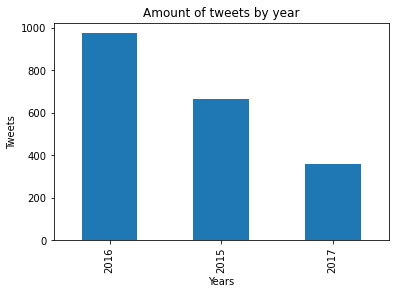

In [98]:
plt.xlabel('Years')
plt.ylabel('Tweets')
plt.title('Amount of tweets by year')
tweets_plot = ((df_tweet_img_clean_merge['timestamp']).dt.year.value_counts())
tweets_plot.plot.bar()

Number of dogs by stages

<AxesSubplot:title={'center':'Dogs by Stages'}, xlabel='Dog Stages', ylabel='Dogs'>

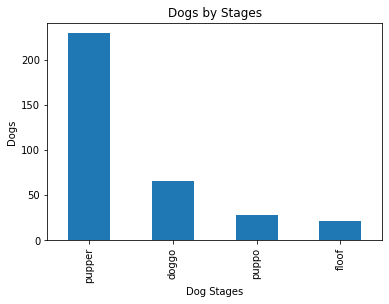

In [99]:
plt.xlabel('Dog Stages')
plt.ylabel('Dogs')
plt.title('Dogs by Stages')
dog_stages_plot = df_tweet_img_clean_merge['stages'].value_counts()
dog_stages_plot.plot.bar()

Number of retweets and favorites (likes)

In [100]:
df_tweet_img_clean_merge.retweet_count.value_counts()

516     4
3652    4
1124    4
146     4
748     4
       ..
513     1
515     1
2564    1
517     1
4098    1
Name: retweet_count, Length: 1595, dtype: int64

In [101]:
df_tweet_img_clean_merge.favorite_count.value_counts()

1691     3
2918     3
2176     3
345      3
2706     3
        ..
28469    1
6614     1
2520     1
475      1
4094     1
Name: favorite_count, Length: 1850, dtype: int64

Comparative plot of the retweet_count and favorite_count columns to visualize the tendency on each one

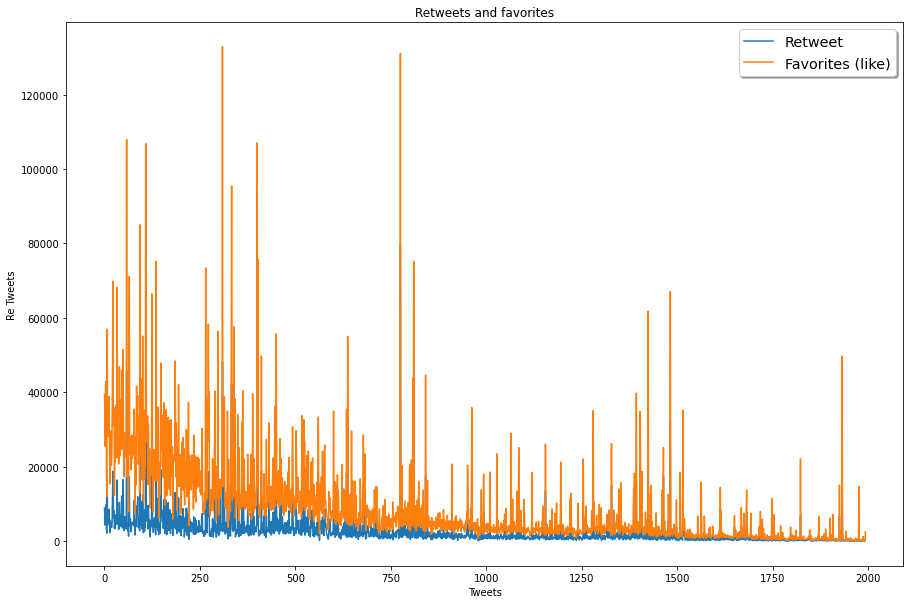

In [102]:
plt.figure(figsize= (15,10))
plt.title('Retweets and favorites')
plt.plot(df_tweet_img_clean_merge.retweet_count)
plt.plot(df_tweet_img_clean_merge.favorite_count)
plt.xlabel('Tweets')
plt.ylabel('Re Tweets')
plt.legend(['Retweet', 'Favorites (like)'],loc='upper right', shadow=True, fontsize='x-large')
plt.show()

Due the previous plot, we plot the IQR to obtain the lowest and higher quarter.

<AxesSubplot:>

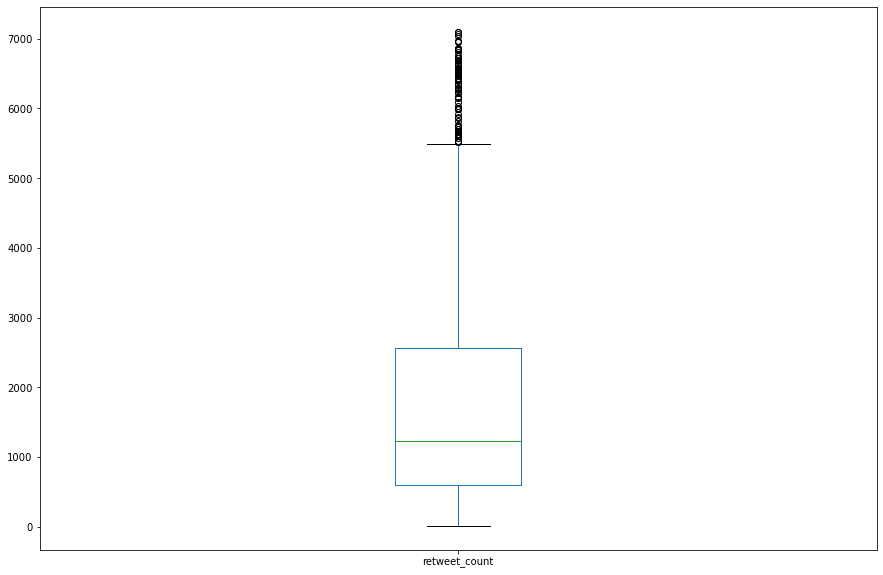

In [103]:
plt.figure(figsize= (15,10))
calc_outlier_iqr = df_tweet_img_clean_merge['retweet_count']
Q1 = calc_outlier_iqr.quantile(.25)
Q3 = calc_outlier_iqr.quantile(.75)
IQR = Q3 - Q1
LE = Q1 - 1.5 * IQR
HE = Q3 + 1.5 * IQR
outlier_iqr = calc_outlier_iqr[(calc_outlier_iqr>=LE) & (calc_outlier_iqr<= HE)]
outlier_iqr.plot(kind = 'box')

<BarContainer object of 1994 artists>

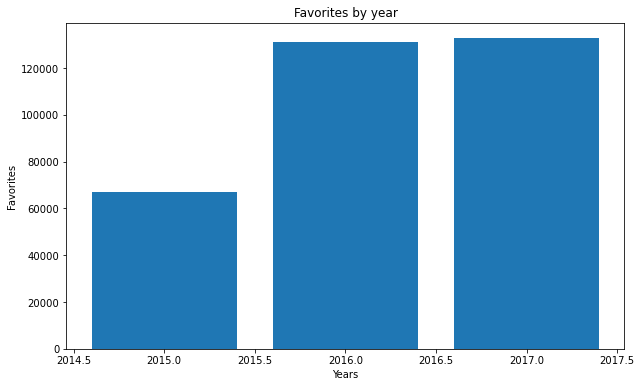

In [104]:
plt.figure(figsize= (10,6))
plt.title('Favorites by year')
plt.xlabel('Years')
plt.ylabel('Favorites')
plt.bar(df_tweet_img_clean_merge['timestamp'].dt.year, df_tweet_img_clean_merge['favorite_count'])

<BarContainer object of 1994 artists>

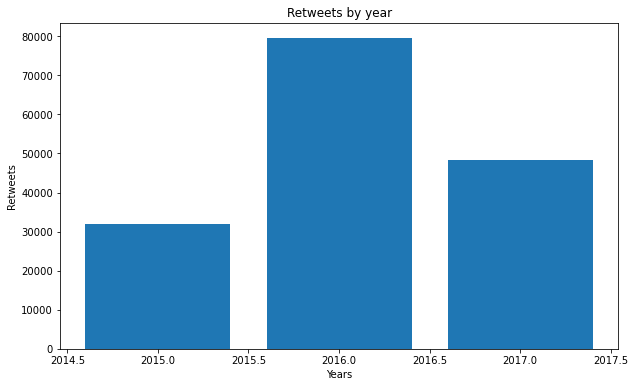

In [105]:
plt.figure(figsize= (10,6))
plt.title('Retweets by year')
plt.xlabel('Years')
plt.ylabel('Retweets')
plt.bar(df_tweet_img_clean_merge['timestamp'].dt.year, df_tweet_img_clean_merge['retweet_count'])

###     References:
- Udacity - Felipe Mallicura's Classes
- pandas.pydata.org
- docs.python.org
- matplotlib.org
- stackoverflow.com
- Exploratory Data Analysis (EDA) and Data Visualization with Python - Vigneshwer Dhinakaran 